In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df=pd.read_csv('xAPI-Edu-Data.csv')

In [4]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [8]:
#Answer1.................................................
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [10]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
USA              6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [11]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

In [12]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

<AxesSubplot:>

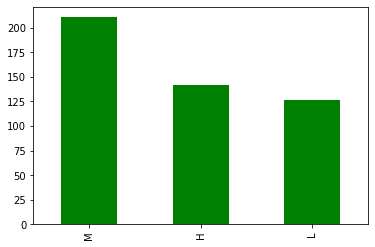

In [14]:
df['Class'].value_counts().plot(kind='bar' ,color='green')

Text(0, 0.5, 'count')

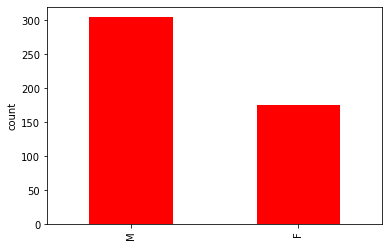

In [43]:
df['gender'].value_counts().plot(kind='bar' ,color='red')
plt.ylabel('count')

Text(0, 0.5, 'count')

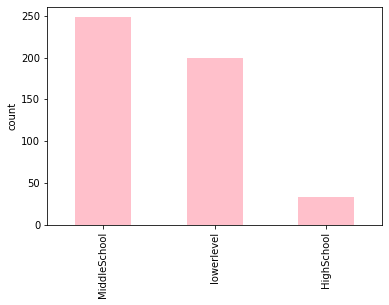

In [20]:
df['StageID'].value_counts().plot(kind='bar' ,color='pink')
plt.ylabel('count')

Text(0, 0.5, 'count')

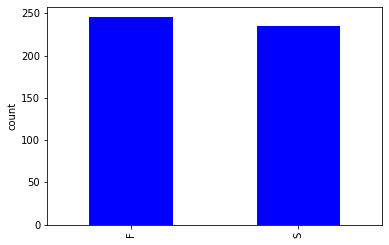

In [22]:
df['Semester'].value_counts().plot(kind='bar' ,color='blue')
plt.ylabel('count')

Text(0, 0.5, 'count')

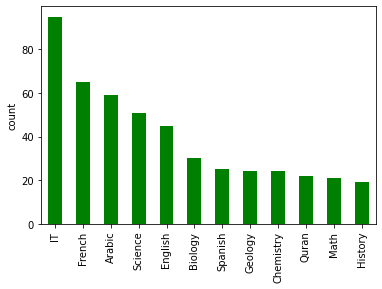

In [24]:
df['Topic'].value_counts().plot(kind='bar' ,color='green')
plt.ylabel('count')

Text(0, 0.5, 'count')

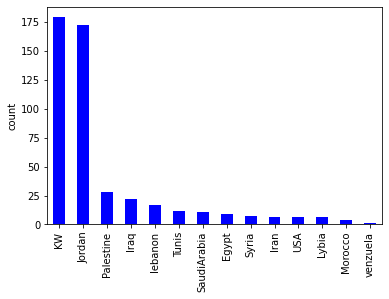

In [25]:
df['NationalITy'].value_counts().plot(kind='bar' ,color='blue')
plt.ylabel('count')

In [41]:
#Answer 2...............

<AxesSubplot:xlabel='gender', ylabel='count'>

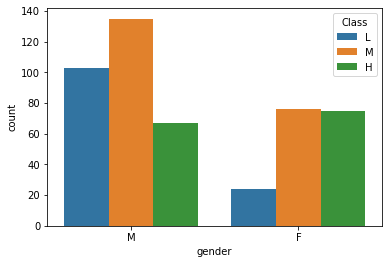

In [49]:

sns.countplot(x=df['gender'], hue='Class', data=df, order=['M','F'], hue_order=['L','M','H'])


<AxesSubplot:xlabel='gender', ylabel='count'>

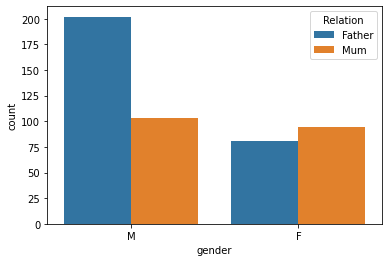

In [50]:
sns.countplot(x=df['gender'], hue='Relation', data=df, order=['M','F'])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

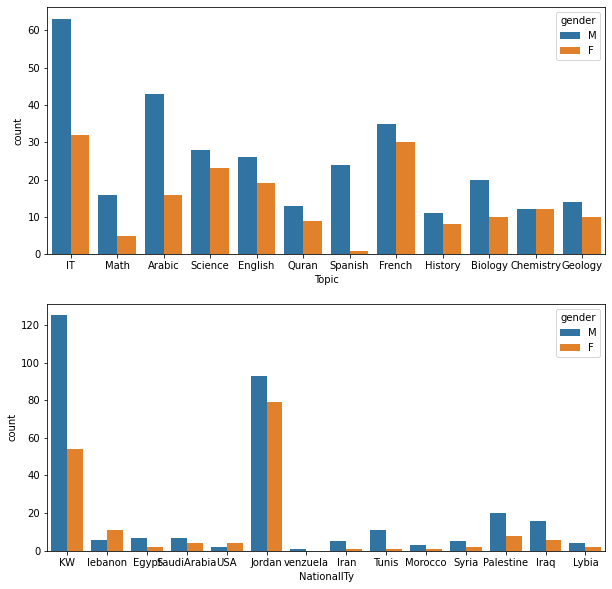

In [53]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=df, ax=axis2)


<AxesSubplot:xlabel='Class', ylabel='Discussion'>

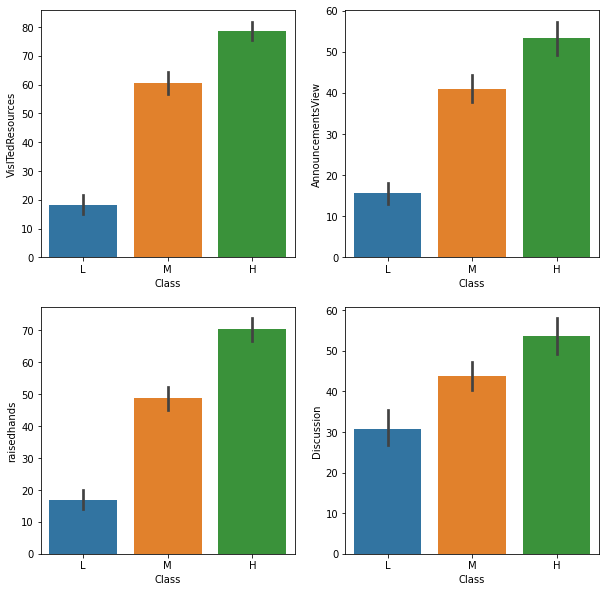

In [54]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])
# insight(more the participation better the results) 

In [58]:
# modeling
stageID = pd.get_dummies(df['StageID'], drop_first=True)
gender = pd.get_dummies(df['gender'], drop_first=True)
Semester = pd.get_dummies(df['Semester'], drop_first=True)
Relation = pd.get_dummies(df['Relation'], drop_first=True)
SectionID = pd.get_dummies(df['SectionID'], drop_first=True)
ParentAnsweringSurvey = pd.get_dummies(df['ParentAnsweringSurvey'], drop_first=True)
ParentschoolSatisfaction = pd.get_dummies(df['ParentschoolSatisfaction'], drop_first=True)
class1 = pd.get_dummies(df['Class'], drop_first=True)
StudentAbsenceDays = pd.get_dummies(df['StudentAbsenceDays'], drop_first=True)

In [60]:
cols = list(df.columns)
drop_cols = [i for i in cols if df[i].dtype == 'object']
df.drop(drop_cols,axis=1,inplace=True)

In [61]:
df

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [63]:
df = pd.concat([df,gender,stageID,Semester,Relation,SectionID,ParentAnsweringSurvey,ParentschoolSatisfaction,class1,StudentAbsenceDays],axis=1)

In [64]:
X = df.drop('Good', axis=1)
y = df['Good']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [66]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 1 0 1]


C:\Users\91988\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        41
           1       0.83      0.81      0.82        79

    accuracy                           0.77       120
   macro avg       0.74      0.75      0.74       120
weighted avg       0.77      0.77      0.77       120

